# Project 3: Soccer Analysis

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we may need to install**

In [ ]:
# Run these directly in a cell

#!pip install tensorflow
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **Checking the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_s = pd.read_csv("stats.csv")   # stats table
df_r = pd.read_csv("results.csv")  # results table

df_r

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


- [x] **Check the data types**

In [7]:
df_r.dtypes
# df_s.dtypes

home_team      object
away_team      object
home_goals    float64
away_goals    float64
result         object
season         object
dtype: object

## 2. Cleaning the data

- [x] **Check for spelling mistakes or missing data**

In [80]:
df_r["season"].value_counts()   # check all seasons and their value counts, no inconsistencies here
df_r["home_team"].value_counts()
df_r["away_team"].value_counts()

df_r.isnull().sum()   # Nothing unusual here
df_s.isnull().sum()   # There are quite a few that should be turned to 0

# For the dispossessed column, the NaN values may arise from the people not being able to record those instances instead of them being 0.
# Let's see if this 0 value exists in this column to confirm if it's a missing value or not

df_s.loc[df_s["dispossessed"] == 0]

# It doesn't exist. Goalkeepers and some defenders might not have dispossession stats because they rarely dribble.
# For the sake of argument, let's assume this was a mistake and convert it to zero


df_s.fillna({"dispossessed": 0}, inplace=True)    # Turn the values to 0

df_s

# Let's do the same for the "big chance missed" column

df_s.fillna({"big_chance_missed": 0}, inplace=True)

df_s["total_through_ball"].value_counts()   # We'll check later for other mistakes that may arise

total_through_ball
57.0     6
54.0     5
30.0     5
37.0     5
22.0     5
        ..
252.0    1
212.0    1
114.0    1
136.0    1
63.0     1
Name: count, Length: 122, dtype: int64

- [x] **Check if the results column is accurate**

In [47]:
# the results column tells us who won (H - home team won, D- there was a draw, A - away team won)
# Let's see if they're consistent:

df_r.loc[(df_r["home_goals"] > df_r["away_goals"]) & (df_r["result"] != "H")]
df_r.loc[(df_r["home_goals"] < df_r["away_goals"]) & (df_r["result"] != "A")]
df_r.loc[(df_r["home_goals"] == df_r["away_goals"]) & (df_r["result"] != "D")]

# There aren't any inconsistencies, but if there were:

df_r.loc[(df_r["home_goals"] > df_r["away_goals"]) & (df_r["result"] != "H"), "result"] = "H"
df_r.loc[(df_r["home_goals"] < df_r["away_goals"]) & (df_r["result"] != "A"), "result"] = "A"
df_r.loc[(df_r["home_goals"] = df_r["away_goals"]) & (df_r["result"] != "D"), "result"] = "D"

# This represents the results correctly


,home_team,away_team,home_goals,away_goals,result,season
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007
6,West Ham United,Charlton Athletic,3.0,1.0,H,2006-2007
...,...,...,...,...,...,...
4553,Liverpool,Brighton and Hove Albion,4.0,0.0,H,2017-2018
4554,Manchester United,Watford,1.0,0.0,H,2017-2018
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


- [x] **Check the stats table for inconsistencies**

In [51]:
df_s.dtypes  # We can't extrapolate anything from the data just yet. We must analyze it and clean it later 

team                     object
wins                    float64
losses                  float64
goals                   float64
total_yel_card          float64
total_red_card          float64
total_scoring_att       float64
ontarget_scoring_att    float64
hit_woodwork            float64
att_hd_goal             float64
att_pen_goal            float64
att_freekick_goal       float64
att_ibox_goal           float64
att_obox_goal           float64
goal_fastbreak          float64
total_offside           float64
clean_sheet             float64
goals_conceded          float64
saves                   float64
outfielder_block        float64
interception            float64
total_tackle            float64
last_man_tackle         float64
total_clearance         float64
head_clearance          float64
own_goals               float64
penalty_conceded        float64
pen_goals_conceded      float64
total_pass              float64
total_through_ball      float64
total_long_balls        float64
backward

## 3. Analysis and visualizations

- [x] **Top 10 teams that scored the most goals home**

In [91]:
df_r.sort_values(by="home_goals", ascending=False).head(10)

,home_team,away_team,home_goals,away_goals,result,season
1265,Tottenham Hotspur,Wigan Athletic,9.0,1.0,H,2009-2010
1514,Chelsea,Wigan Athletic,8.0,0.0,H,2009-2010
1928,Manchester United,Arsenal,8.0,2.0,H,2011-2012
3116,Southampton,Sunderland,8.0,0.0,H,2014-2015
754,Middlesbrough,Manchester City,8.0,1.0,H,2007-2008
2458,Chelsea,Aston Villa,8.0,0.0,H,2012-2013
1341,Chelsea,Sunderland,7.0,2.0,H,2009-2010
1448,Chelsea,Aston Villa,7.0,1.0,H,2009-2010
1497,Chelsea,Stoke City,7.0,0.0,H,2009-2010
450,Portsmouth,Reading,7.0,4.0,H,2007-2008


- [x] **Top 10 teams that scored the most goals away**

In [93]:
df_r.sort_values(by="away_goals", ascending=False).head(10)

# We can see that teams seem to score more at home than away

,home_team,away_team,home_goals,away_goals,result,season
4173,Hull City,Tottenham Hotspur,1.0,7.0,A,2016-2017
1986,Manchester United,Manchester City,1.0,6.0,A,2011-2012
4169,Leicester City,Tottenham Hotspur,1.0,6.0,A,2016-2017
4225,Watford,Manchester City,0.0,6.0,A,2017-2018
2229,Norwich City,Manchester City,1.0,6.0,A,2011-2012
1147,Everton,Arsenal,1.0,6.0,A,2009-2010
3066,Everton,Chelsea,3.0,6.0,A,2014-2015
2952,Cardiff City,Liverpool,3.0,6.0,A,2013-2014
712,Derby County,Aston Villa,0.0,6.0,A,2007-2008
739,Derby County,Arsenal,2.0,6.0,A,2007-2008


- [x] **Give a ranking to each game based on the disparity of goals (5 goals "A rank", 3-4 goals "B rank", 2 goals "C rank", 1 goal "D rank", 0 goals "E rank")**

In [277]:
df_r["goal_disparity"] = np.abs(df_r["home_goals"] - df_r["away_goals"])

def game_rank(disparity):
    if disparity >= 5:
        return "A rank"
    elif 3 < disparity <= 4:
        return "B rank"
    elif disparity == 2:
        return "C rank"
    elif disparity == 1:
        return "D rank"
    elif disparity == 0:
        return "E rank"

df_r["Game_rank"] = df_r["goal_disparity"].apply(game_rank)

df_r["Game_rank"].value_counts()  # how many games occurred of each rank

Game_rank
D rank    1698
E rank    1164
C rank     962
B rank     185
A rank      96
Name: count, dtype: int64

- [x] **Create a pie chart for the ranking of games**

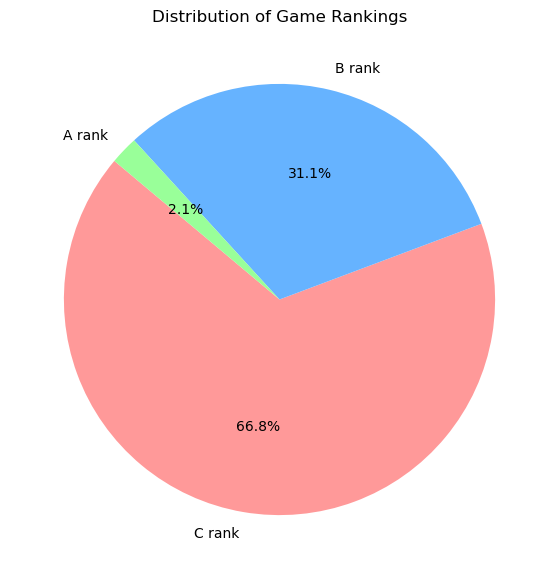

In [207]:

rank_counts = df_r["Game_rank"].value_counts()

colors = ["#ff9999", "#66b3ff", "#99ff99"]  # Red, Blue, Green

plt.figure(figsize=(7, 7))
plt.pie(rank_counts, labels=rank_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)

plt.title("Distribution of Game Rankings")
plt.show()


- [x] **Which team had the most A rank performances?**

In [199]:
# Filter only "A rank" games
a_rank_games = df_r.loc[df_r["Game_rank"] == "A rank"]

# Count A rank performances for home and away teams
home_a_rank_wins = a_rank_games[a_rank_games["result"] == "H"].groupby("home_team").size()
away_a_rank_wins = a_rank_games[a_rank_games["result"] == "A"].groupby("away_team").size()

# Combine both home and away performances
total_a_rank_performances = home_a_rank_wins.add(away_a_rank_wins, fill_value=0).sort_values(ascending=False).head(1)

total_a_rank_performances


Manchester City    19.0
dtype: float64

- [x] **Based on the result dataframe, which team scored the most goals home and away, spanning all seasons**

In [205]:
home_goals = df_r.groupby("home_team")["home_goals"].sum().sort_values(ascending=False).head(1)  # Manchester City scored the most home goals

away_goals = df_r.groupby("away_team")["away_goals"].sum().sort_values(ascending=False).head(1) # Arsenal scored the most away goals

home_goals_mc = df_r.loc[df_r["home_team"] == "Manchester City"]["home_goals"].sum()


away_goals_mc = df_r.loc[df_r["away_team"] == "Manchester City"]["away_goals"].sum()


total_goals_mc = home_goals_mc + away_goals_mc

total_goals_mc

home_goals_a = df_r.loc[df_r["home_team"] == "Arsenal"]["home_goals"].sum()

away_goals_a = df_r.loc[df_r["away_team"] == "Arsenal"]["away_goals"].sum()

total_goals_a = home_goals_a + away_goals_a

total_goals_a

# Manchester city is only 5 goals ahead of Arsenal throughout the seasons

861.0

- [x] **Which team scored the most goals overall, throughout all the seasons?**

In [136]:
home_goals = df_r.groupby("home_team")["home_goals"].sum()
away_goals = df_r.groupby("away_team")["away_goals"].sum()


total_goals = home_goals.add(away_goals, fill_value=0)  # Combine both home and away goals

total_goals.sort_values(ascending= False).head(1)

# As we can see, neither Manchester City nor Arsenal were the teams that scored the most, but rather Manchester United

home_team
Manchester United    867.0
dtype: float64

- [x] **Which team scored the most goals per season?**

In [212]:
# Sum home and away goals per team and season
home_goals_per_season = df_r.groupby(["season", "home_team"])["home_goals"].sum()
away_goals_per_season = df_r.groupby(["season", "away_team"])["away_goals"].sum()

# Combine home and away goals per team and season
total_goals_per_season = home_goals_per_season.add(away_goals_per_season, fill_value=0)

# Find the team with the most goals per season
most_goals_per_season = total_goals_per_season.groupby("season").idxmax()
most_goals_per_season_goals = total_goals_per_season.groupby("season").max()


result_mgps = pd.DataFrame({"Team": most_goals_per_season,"Goals": most_goals_per_season_goals})

result_mgps

,Team,Goals
season,,
2006-2007,"(2006-2007, Manchester United)",83.0
2007-2008,"(2007-2008, Manchester United)",80.0
2008-2009,"(2008-2009, Liverpool)",77.0
2009-2010,"(2009-2010, Chelsea)",103.0
2010-2011,"(2010-2011, Manchester United)",78.0
2011-2012,"(2011-2012, Manchester City)",93.0
2012-2013,"(2012-2013, Manchester United)",86.0
2013-2014,"(2013-2014, Manchester City)",102.0
2014-2015,"(2014-2015, Manchester City)",83.0


- [x] **Create a histogram for the previous result**

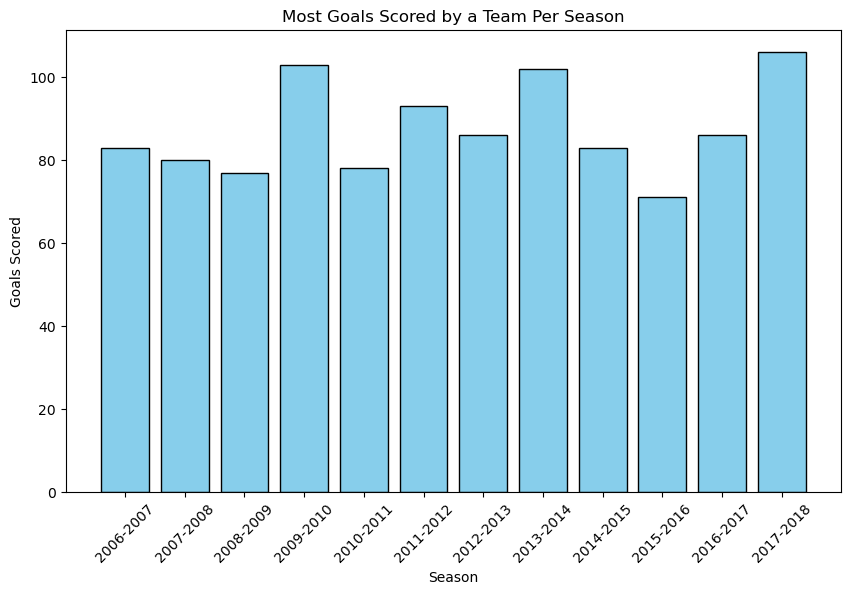

In [218]:

# Plot a histogram of goals scored by the top team each season
plt.figure(figsize=(10, 6))
plt.bar(result_mgps.index.astype(str), result_mgps["Goals"], color="skyblue", edgecolor="black")


plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.title("Most Goals Scored by a Team Per Season")
plt.xticks(rotation=45)  # Rotate season labels for better visibility

plt.show()


- [x] **Calculate the Elo rating for each team based on their match results, updating the rating after every match.**

In [255]:
import pandas as pd
import numpy as np

# Example match data (replace with your actual data)
data = {
    'home_team': ['team_a', 'team_a', 'team_b', 'team_c', 'team_b'],
    'away_team': ['team_b', 'team_c', 'team_c', 'team_b', 'team_a'],
    'home_goals': [2, 1, 3, 1, 2],
    'away_goals': [1, 1, 2, 2, 1],
    'result': ['win', 'draw', 'home_win', 'draw', 'away_win']
}

df = pd.DataFrame(data)

# Initial Elo rating for all teams (e.g., starting with 1500)
initial_rating = 1500
teams = pd.concat([df['home_team'], df['away_team']]).unique()
elo_ratings = {team: initial_rating for team in teams}

# Constants for the Elo rating system
K = 30  # K-factor (adjust based on the desired sensitivity of Elo changes)


def update_elo(home_team, away_team, home_goals, away_goals, elo_ratings, K=30):
    # Calculate expected scores (E) for both teams
    home_rating = elo_ratings[home_team]
    away_rating = elo_ratings[away_team]
    
    E_home = 1 / (1 + 10 ** ((away_rating - home_rating) / 400))
    E_away = 1 / (1 + 10 ** ((home_rating - away_rating) / 400))
    
    # Determine the actual score (S) for both teams
    if home_goals > away_goals:
        S_home = 1  # Home team wins
        S_away = 0  # Away team loses
    elif home_goals < away_goals:
        S_home = 0  # Home team loses
        S_away = 1  # Away team wins
    else:
        S_home = 0.5  # Draw
        S_away = 0.5  # Draw
    
    # Update the Elo ratings
    elo_ratings[home_team] += K * (S_home - E_home)
    elo_ratings[away_team] += K * (S_away - E_away)

    return elo_ratings

# Loop over each match and update Elo ratings
for index, row in df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_goals = row['home_goals']
    away_goals = row['away_goals']
    
    # Update Elo ratings based on the match outcome
    elo_ratings = update_elo(home_team, away_team, home_goals, away_goals, elo_ratings)

# Display the final Elo ratings
elo_ratings_df = pd.DataFrame(list(elo_ratings.items()), columns=['team', 'elo_rating'])
elo_ratings_df = elo_ratings_df.sort_values(by='elo_rating', ascending=False)
print(elo_ratings_df)


     team   elo_rating
1  team_b  1529.969759
0  team_a  1499.380638
2  team_c  1470.649603


## 4. Data Merging

- [] **Merge the two dataframes results and stats**

In [230]:
# Check both dataframes first to see what join shall we do

df_r
df_s

# The only thing they have in common is the season, so let's merge them like that

# merged_df = df_r.merge(df_s, on="season", how="inner")

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,0.0,1.0,0.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,0.0,2.0,0.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,0.0,1.0,0.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,0.0,1.0,0.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,0.0,2.0,0.0,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


# Data Science

## 5. Inferential Statistics

- [] **Compute the correlation matrix for various columns**

## 6. PCA(Principal Component Analysis)

- [] **Conduct a PCA to **

## 7. Logistic Regression

- [x] **Predict the outcome (win/loss/draw) of future soccer matches based on historical data using the Logistic Regression model**

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

df_r.dropna(subset=["result"])

df_r['result'] = df_r['result'].map({'win': 1, 'draw': 2, 'loss': 0})
df_r = pd.get_dummies(df_r, columns=['home_team', 'away_team'])

df_r['goal_difference'] = df_r['home_goals'] - df_r['away_goals']
df_r['home_advantage'] = 1  # Indicator of whether the match is a home game (simple version)

features = ['home_advantage', 'goal_difference'] + [col for col in df_r.columns if 'home_team' in col or 'away_team' in col]

X = df_r[features]
y = df_r['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyError: "None of [Index(['home_team', 'away_team'], dtype='object')] are in the [columns]"

# 8. Linear Regression

Predicting a continuous target variable, such as goals.
Target Variable: goals
Features: All the other team statistics columns (e.g., total_yel_card, total_red_card, total_scoring_att, etc.)

In [ ]:
X = df[['','','']]
y= df['']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(y_test)
pred_df = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np,sqrt(mse)
r2 = r2.score(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=,y=,data=df, hue="", paletter='viridis')
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

# 9. Random Forest

Use Case: Predicting continuous values, such as goals, based on various team statistics.
Target Variable: goals (number of goals scored by a team)
Features: All the other team statistics columns (e.g., total_yel_card, total_red_card, total_scoring_att, att_freekick_goal, etc.)

In [ ]:
X = df[['','','']]
y = df[]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 42, max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(y_test)

c_m = confusion_matrix(y_test,y_pred)
a_s = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()

# 10. Gradient Boosting

Target Variable: goals
Features: total_yel_card, total_red_card, total_scoring_att, ontarget_scoring_att, att_freekick_goal, clean_sheet, saves, total_pass, total_cross, etc.
Question: "What factors influence the number of goals scored by a team?"

In [ ]:
X = df[['','','']]
y = df['']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = XGBClassifier(random_state = 42, eval_metric='Logloss', use_lsbel_encoder=False)
model.fit(X)
y_pred = model.fit(y_test)

c_m = confusion_matrix(y_test,y_pred)
a_s = accuracy_score(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues")
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

# 11. K-means Clustering

Use Case: Segmenting teams based on their performance statistics.
Target Variable: None (Unsupervised learning — you don’t need a target variable).
Features: All team statistics columns (e.g., total_yel_card, total_red_card, total_scoring_att, att_freekick_goal, etc.).

In [ ]:

X = df[['','','']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

inertia = []
for i in range(1,11):
    k_m = KMeans(n_clusters=k, random_state=42)
    k_m.fit(X)
    inertia.append(k_m.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('')
plt.ylabel('')
ply.title('')
plt.show()

# Now that we've discovered that the "elbow" value is k=

k_m = KMeans(n_clusters = , random_state=42)
k_m.fit(X)
df['k_means'] = k_m.labels_

plt.figure(fgsize=(8,6))
sns.scatterplot(x=,y=,data=df,hue="k_means", palette='viridis')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

# 12. K-Nearest Neighbors

Classifying the match result based on the nearest neighbors of a given match.
Target Variable: result (match result: home win, away win, or draw)
Features: home_goals, away_goals, season, home_team, away_team

# Transfering the data to MySQL

- [x] **Save the original dataset with fixed columns**

In [234]:

df_r = pd.read_csv("results.csv")

df_r.columns = [col.replace(" ", "_") for col in df_r.columns]

df_r.to_csv("SQL_results.csv")

df_s = pd.read_csv("stats.csv")

df_s.columns = [col.replace(" ", "_") for col in df_s.columns]

df_s.to_csv("SQL_stats.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:


df_s = pd.read_csv("clean_stats.csv")

df_s.columns = [col.replace(" ", "_") for col in df_s.columns]

df_s.to_csv("SQL_clean_stats.csv")

df_r = pd.read_csv("clean_results.csv")

df_r.columns = [col.replace(" ", "_") for col in df_r.columns]

df_r.to_csv("SQL_clean_results.csv")


# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
